# Finder Chart Example -- v3
    DES
    DECaL
    log and cutout options

In [1]:
# imports
import numpy as np
from matplotlib import pyplot as plt
from importlib import reload

from astropy.coordinates import SkyCoord
from astropy import units
from astropy.wcs import WCS
from astropy.io import fits

from frb.surveys import survey_utils,images
from frb.figures import finder

/home/xavier/anaconda3/lib/python3.7/site-packages/astroquery/sdss/__init__.py:29: UserWarning: Experimental: SDSS has not yet been refactored to have its API match the rest of astroquery (but it's nearly there).
  warnings.warn("Experimental: SDSS has not yet been refactored to have its API "


# Grab an image to play around with

In [2]:
coord = SkyCoord('J214425.25-403400.81', unit=(units.hourangle, units.deg))
search_r = 2 * units.arcmin

In [3]:
des_srvy = survey_utils.load_survey_by_name('DES', coord, search_r)

cutout, cutout_hdr = des_srvy.get_cutout(search_r, band='r')

downloading deepest stacked image...


In [4]:
wcs = WCS(cutout_hdr)

In [5]:
cutout.shape

(456, 459)

# Make the finder

In [6]:
np.std(cutout)

28.409332

Using vmnx = (-6.0555277, 12.111055374145508) based on the image stats


<Figure size 432x288 with 0 Axes>

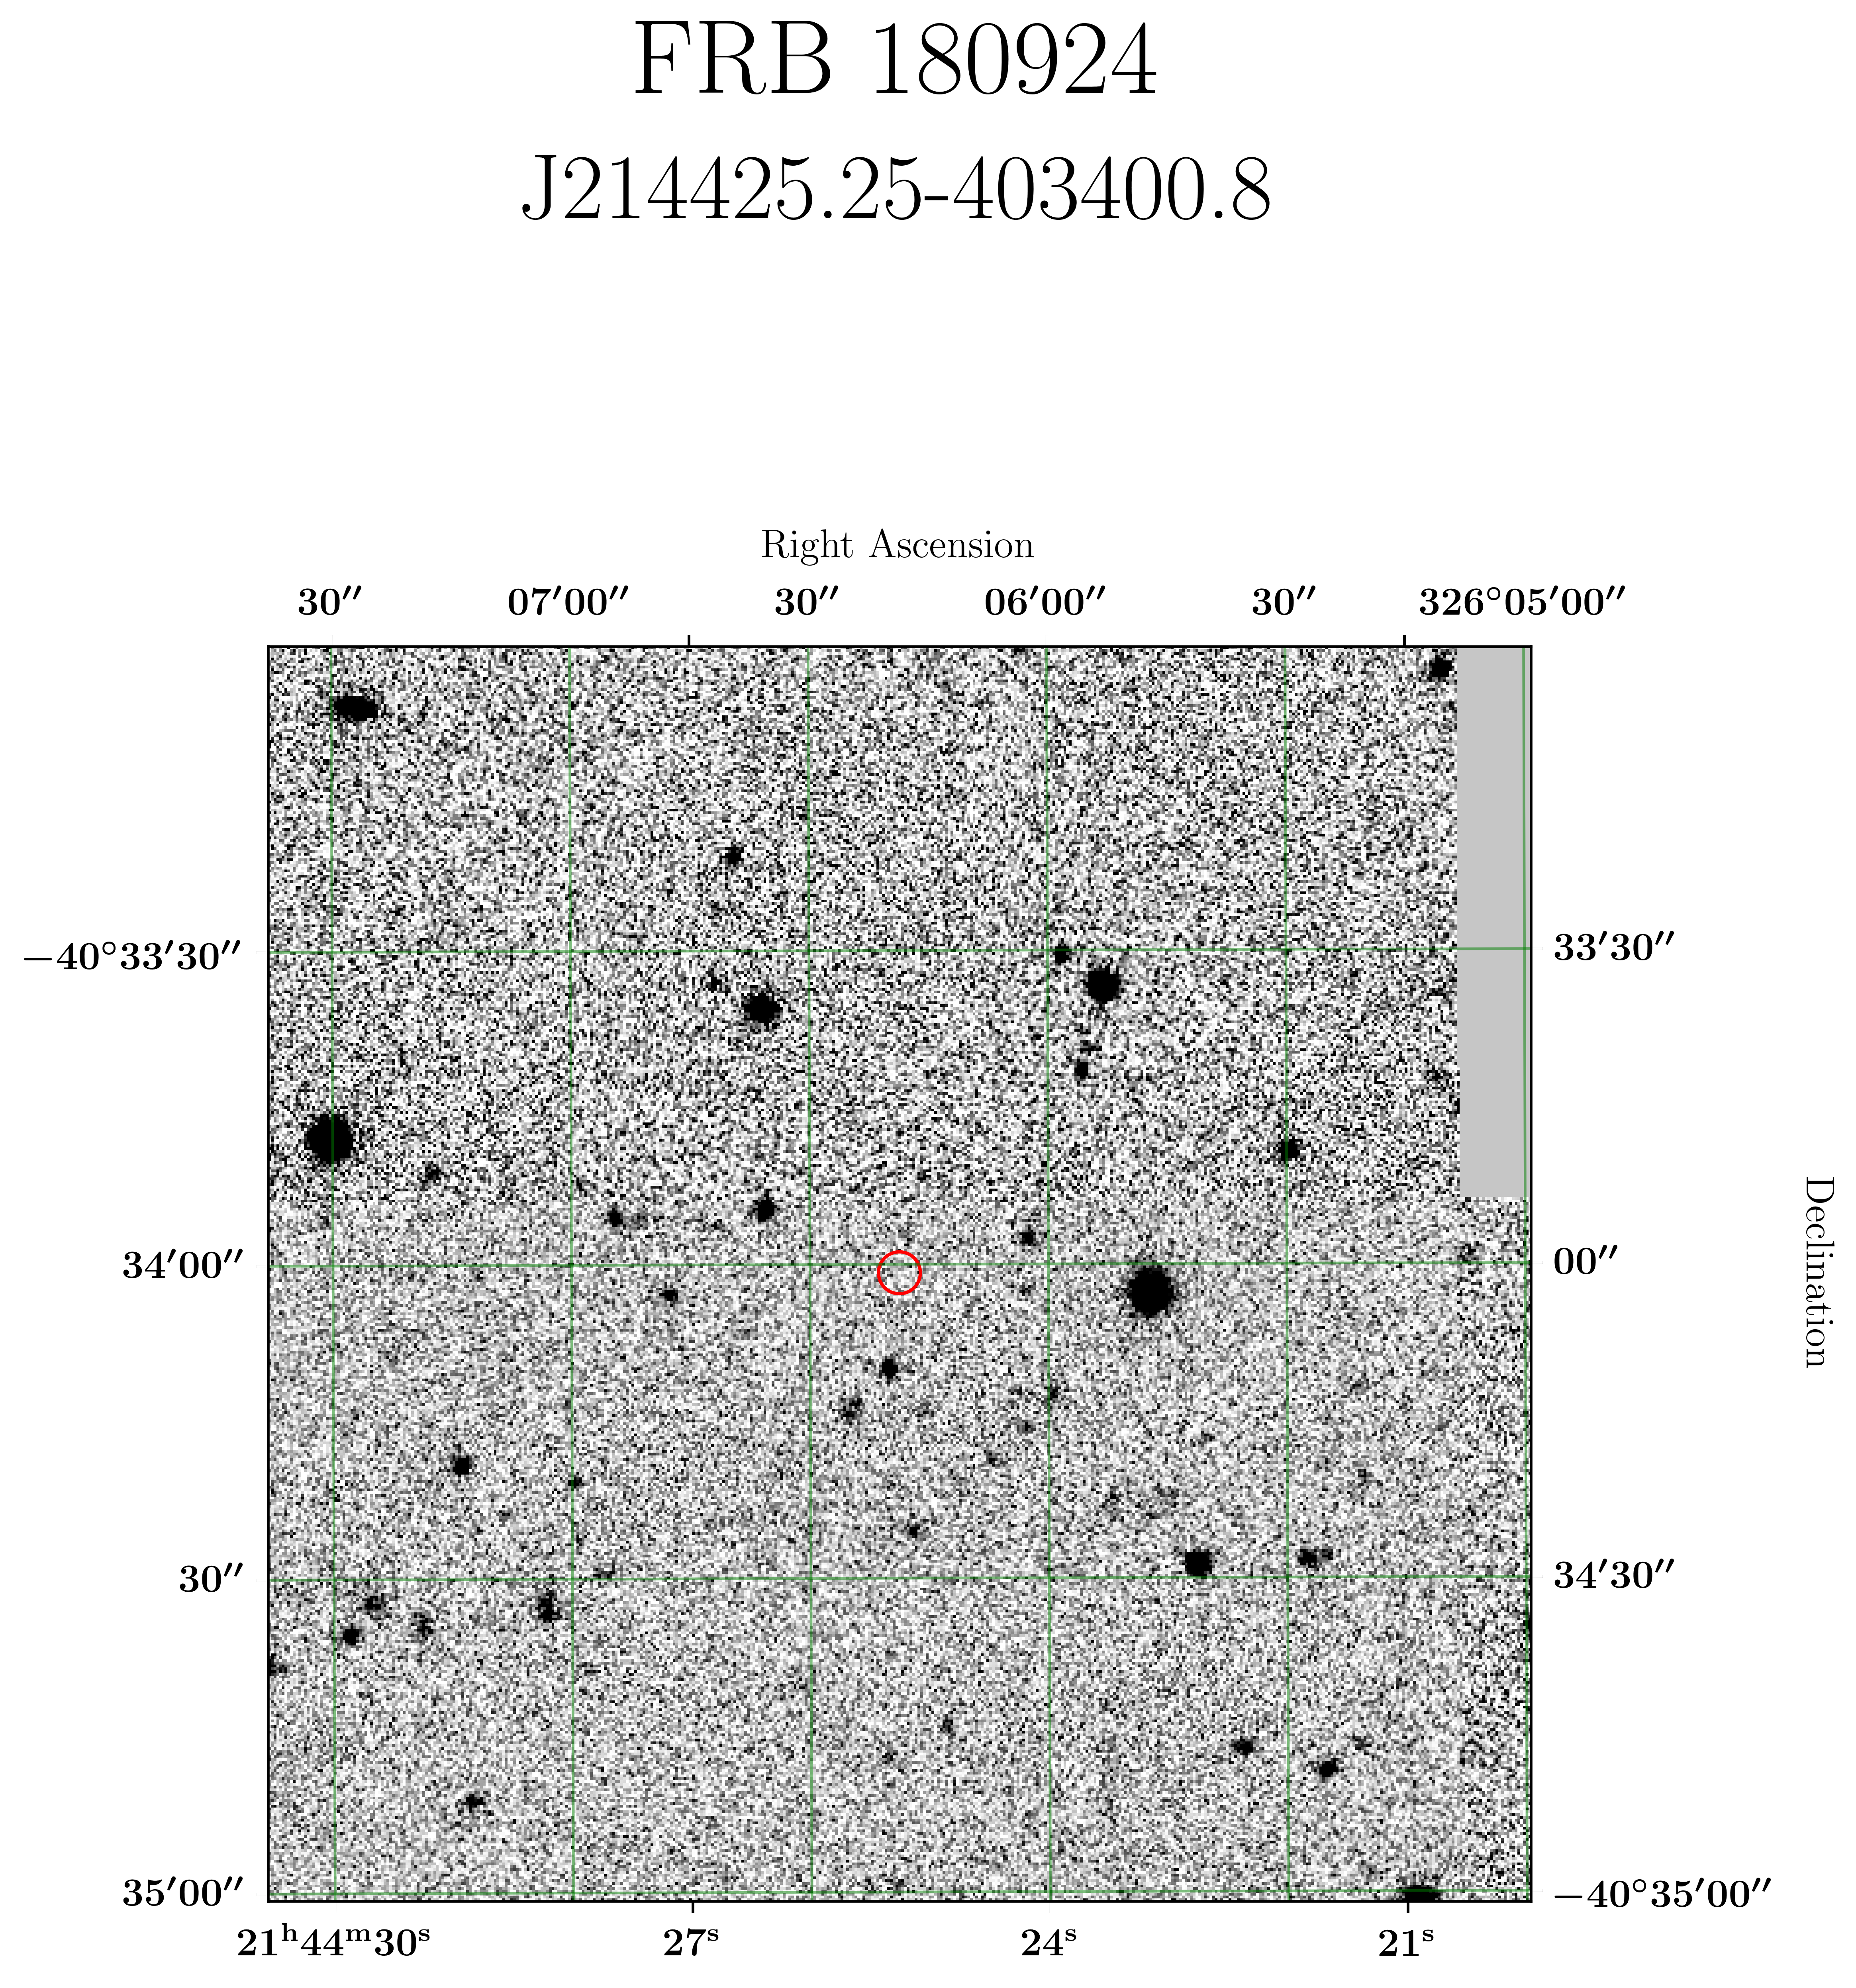

In [9]:
reload(finder)
fig, ax = finder.generate(cutout, wcs, 'FRB 180924', primary_coord=coord) #vmnx=(-10.,200.))

### Log scale

Using vmnx = (-6.0555277, 12.111055374145508) based on the image stats


<Figure size 432x288 with 0 Axes>

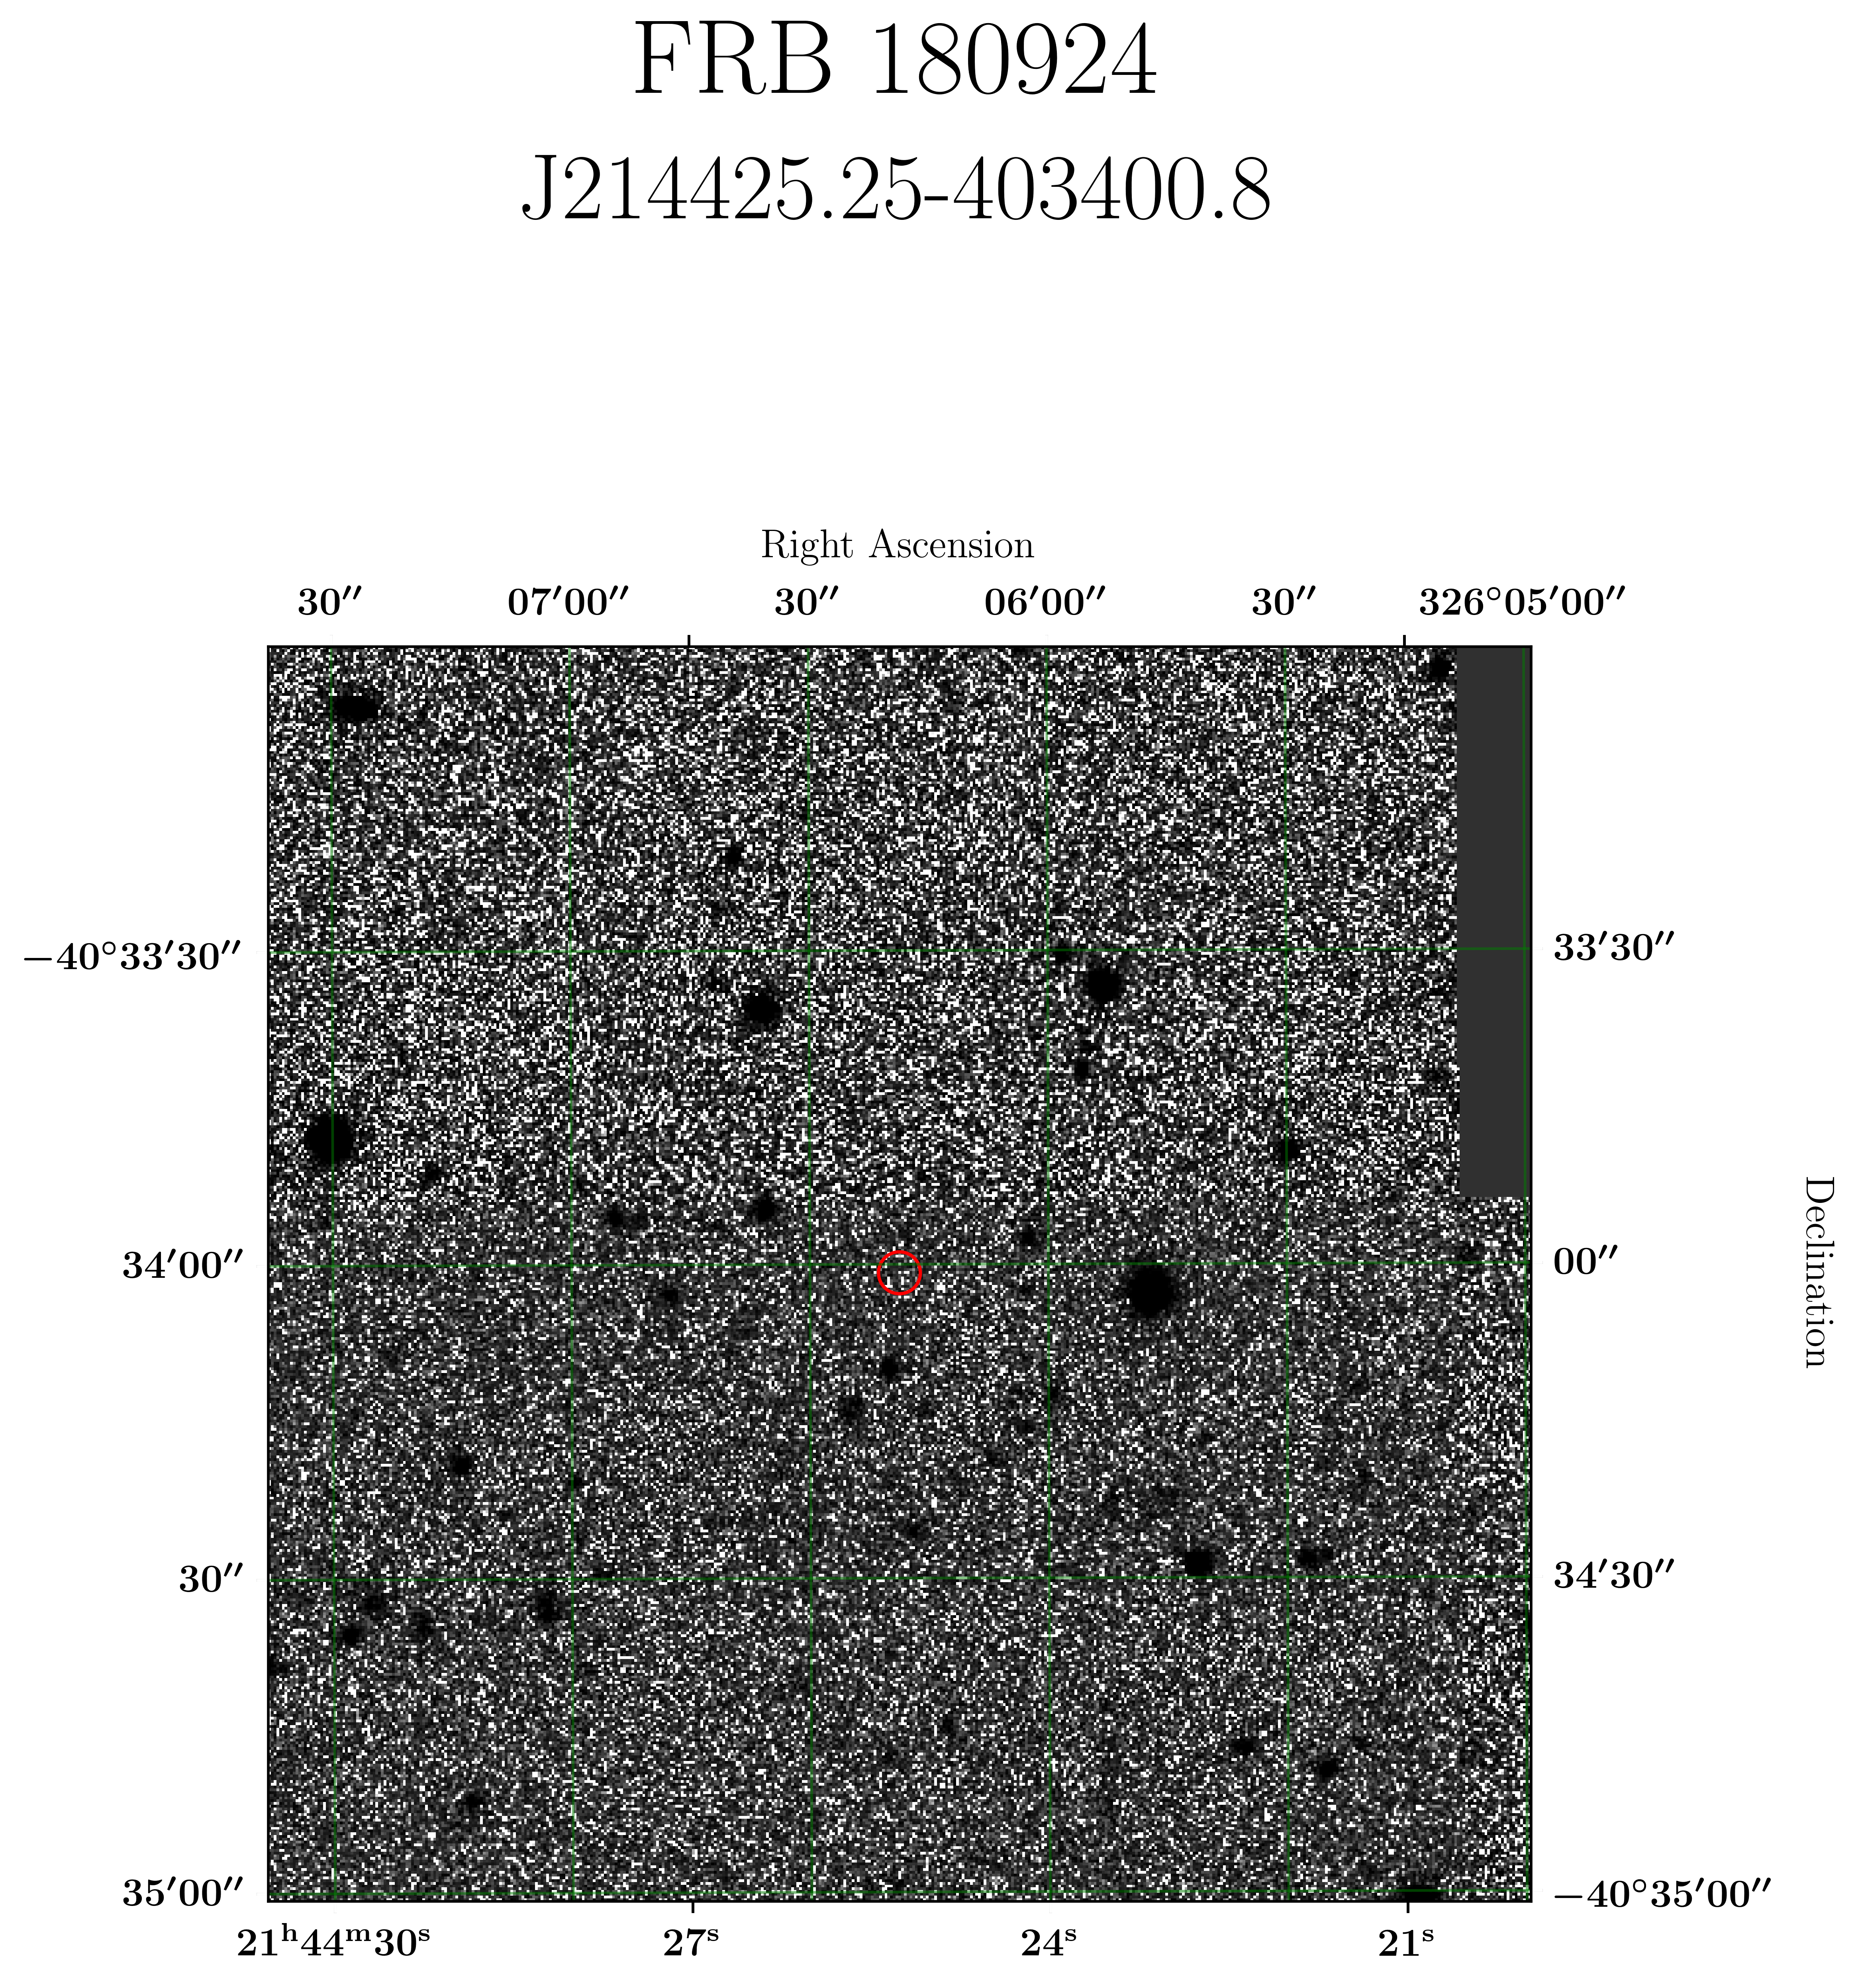

In [10]:
fig, ax = finder.generate(cutout, wcs, 'FRB 180924', primary_coord=coord, log_stretch=True) 

### Cutout

Using vmnx = (-5.2348404, 11.043397545814514) based on the image stats


<Figure size 432x288 with 0 Axes>

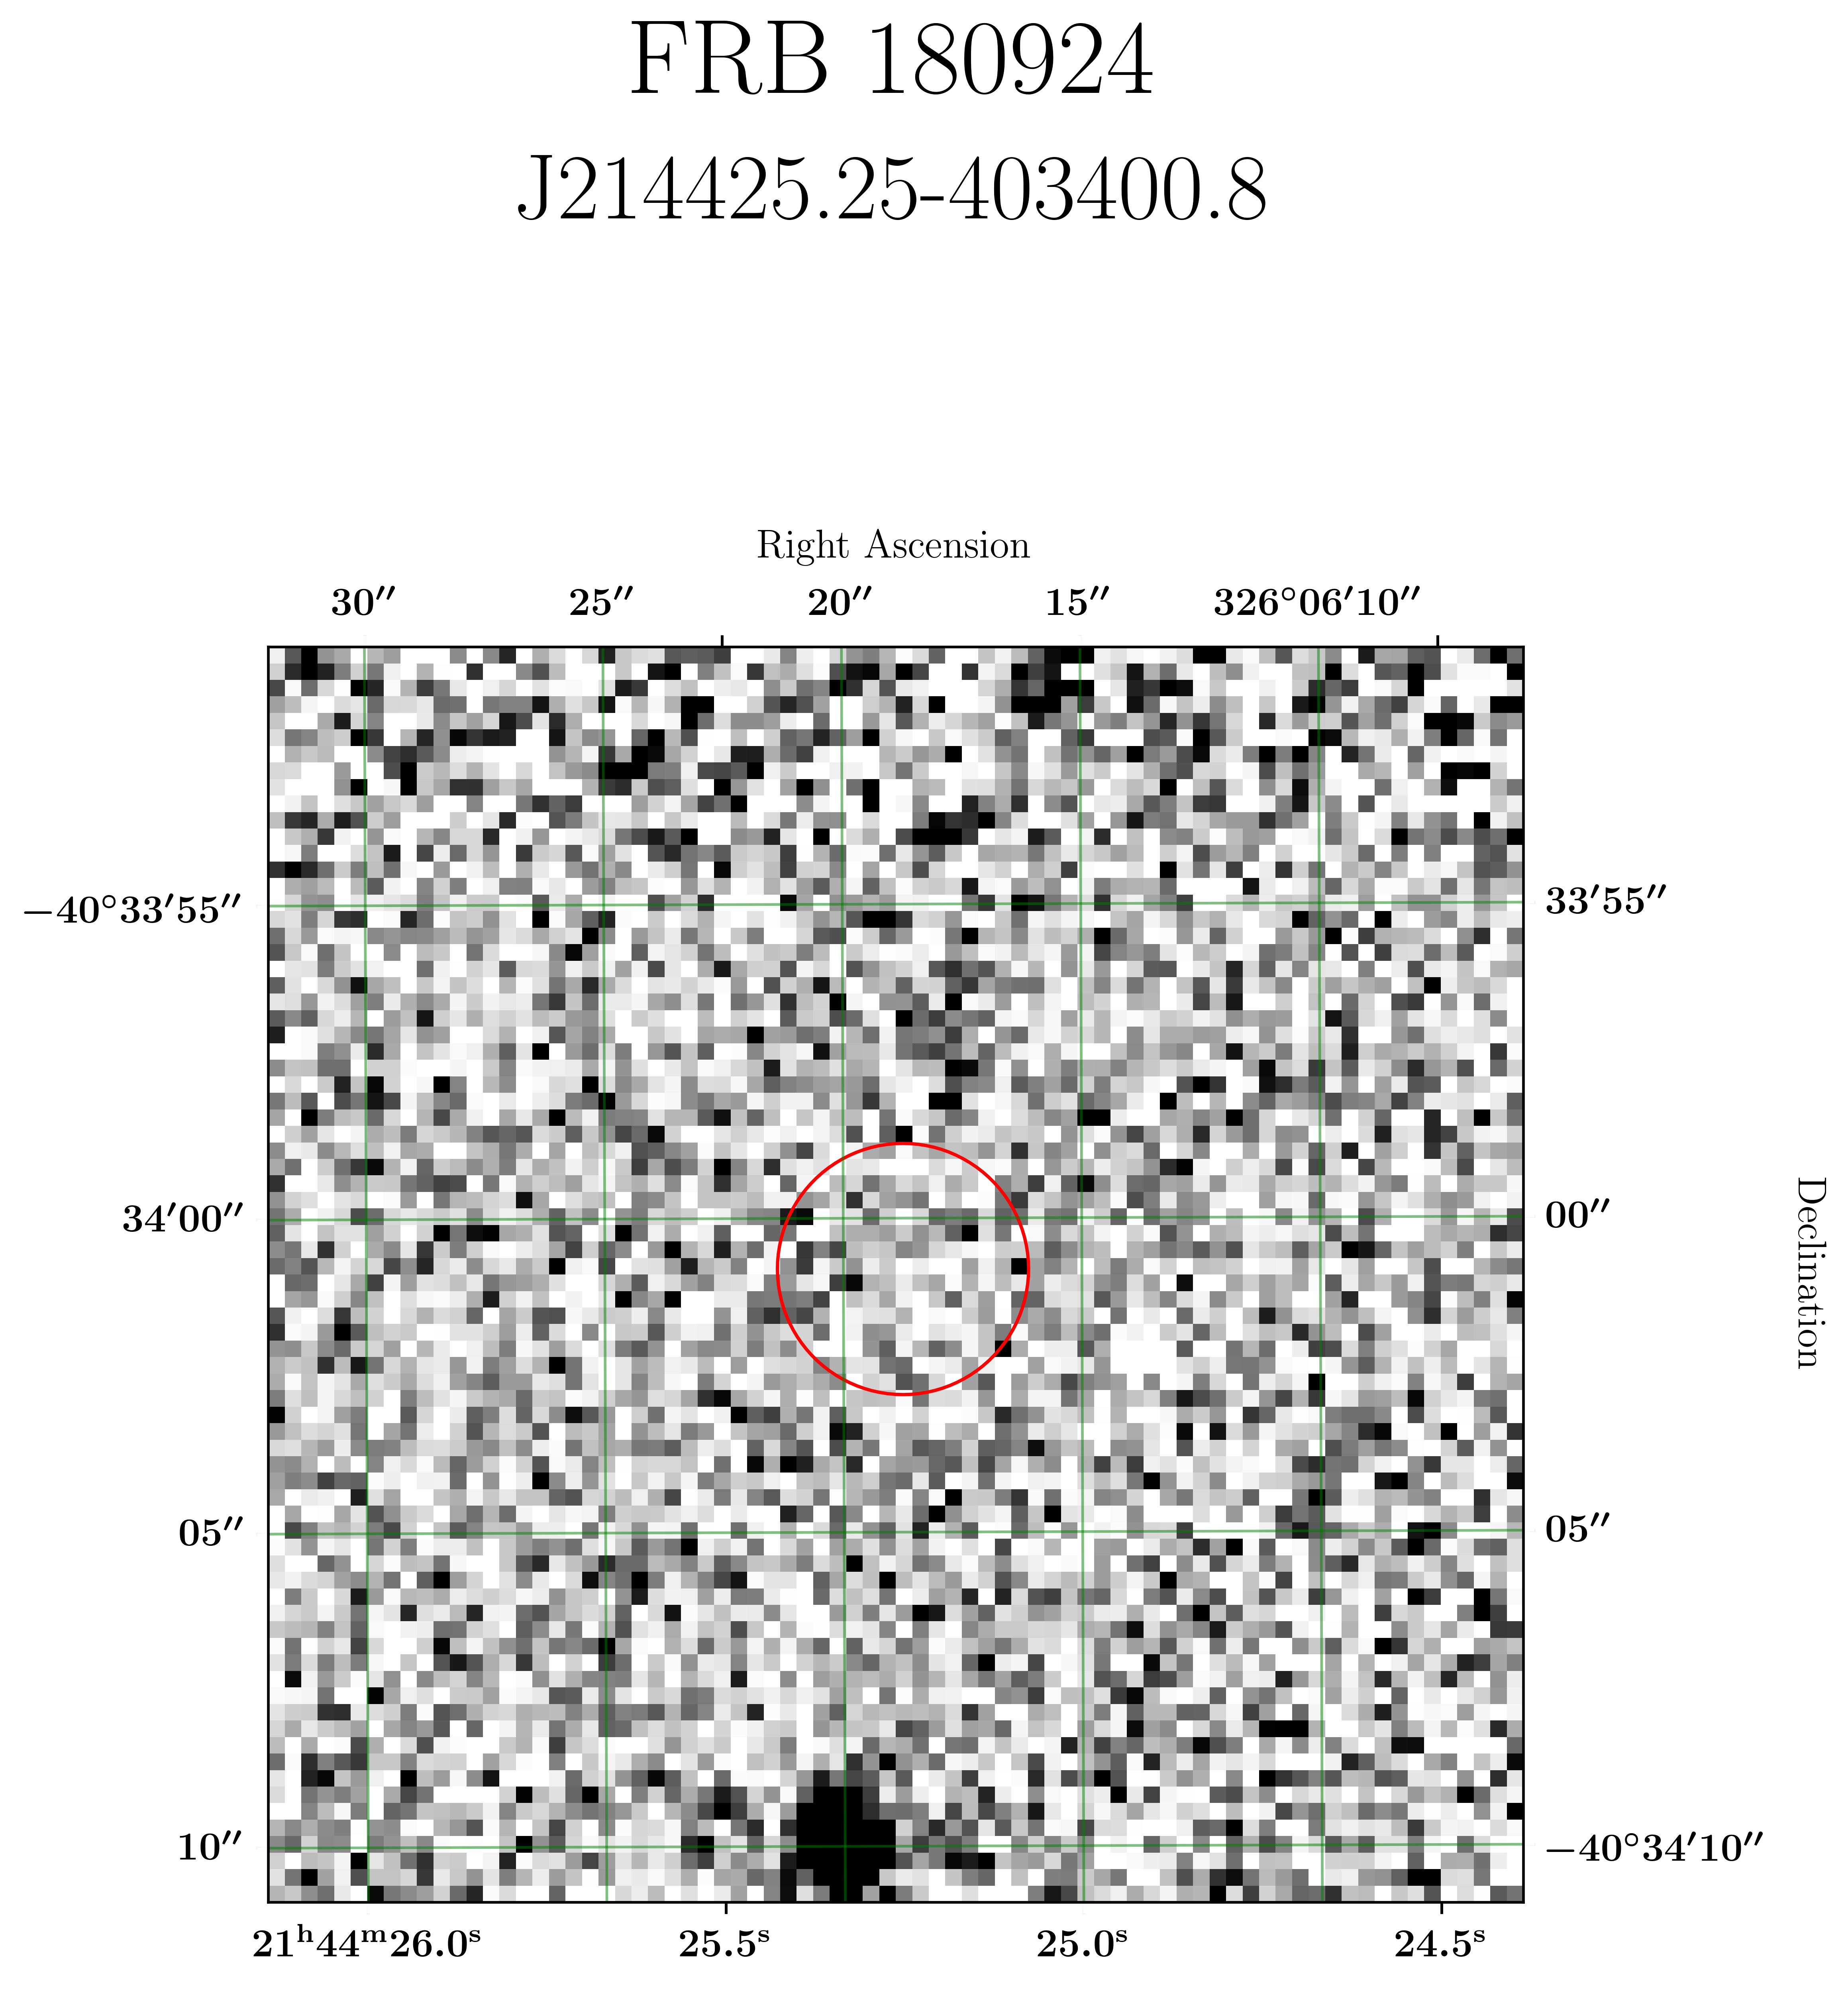

In [12]:
reload(finder)
fig, ax = finder.generate(cutout, wcs, 'FRB 180924', primary_coord=coord,
                         cutout=(coord, 20*units.arcsec))

# DECcals

## Survey object

In [2]:
coord = SkyCoord(ra=45.192774821057974, dec=5.943233713446355, unit='deg')

In [3]:
deccal_srvy = survey_utils.load_survey_by_name('DECaL', coord, 10*units.arcmin)

## Catalog

In [4]:
cat = deccal_srvy.get_catalog()

/data/Projects/FRB/frb/surveys/decals.py:72: RuntimeWarning: invalid value encountered in log10
  main_cat[col] = 2.5*np.log10(1+1/main_cat[col])


## Get cutout image

In [5]:
cutout, cutout_hdr = deccal_srvy.get_cutout(1*units.arcmin, band='z')

In [6]:
cutout

array([[ 0.01173914,  0.00803717,  0.005895  , ...,  0.02458119,
        -0.02460106,  0.00717458],
       [-0.00064942, -0.03879138, -0.05281808, ..., -0.00911673,
         0.01542549, -0.04487586],
       [ 0.03060494,  0.02223118,  0.00474072, ..., -0.04641554,
         0.0206399 ,  0.03120725],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]], dtype=float32)

In [7]:
np.std(cutout)

0.06441528

In [8]:
wcs2 = WCS(cutout_hdr)

In [9]:
second = SkyCoord(ra=45.19217121275808, dec=5.943188095643575, unit='deg')

<Figure size 432x288 with 0 Axes>

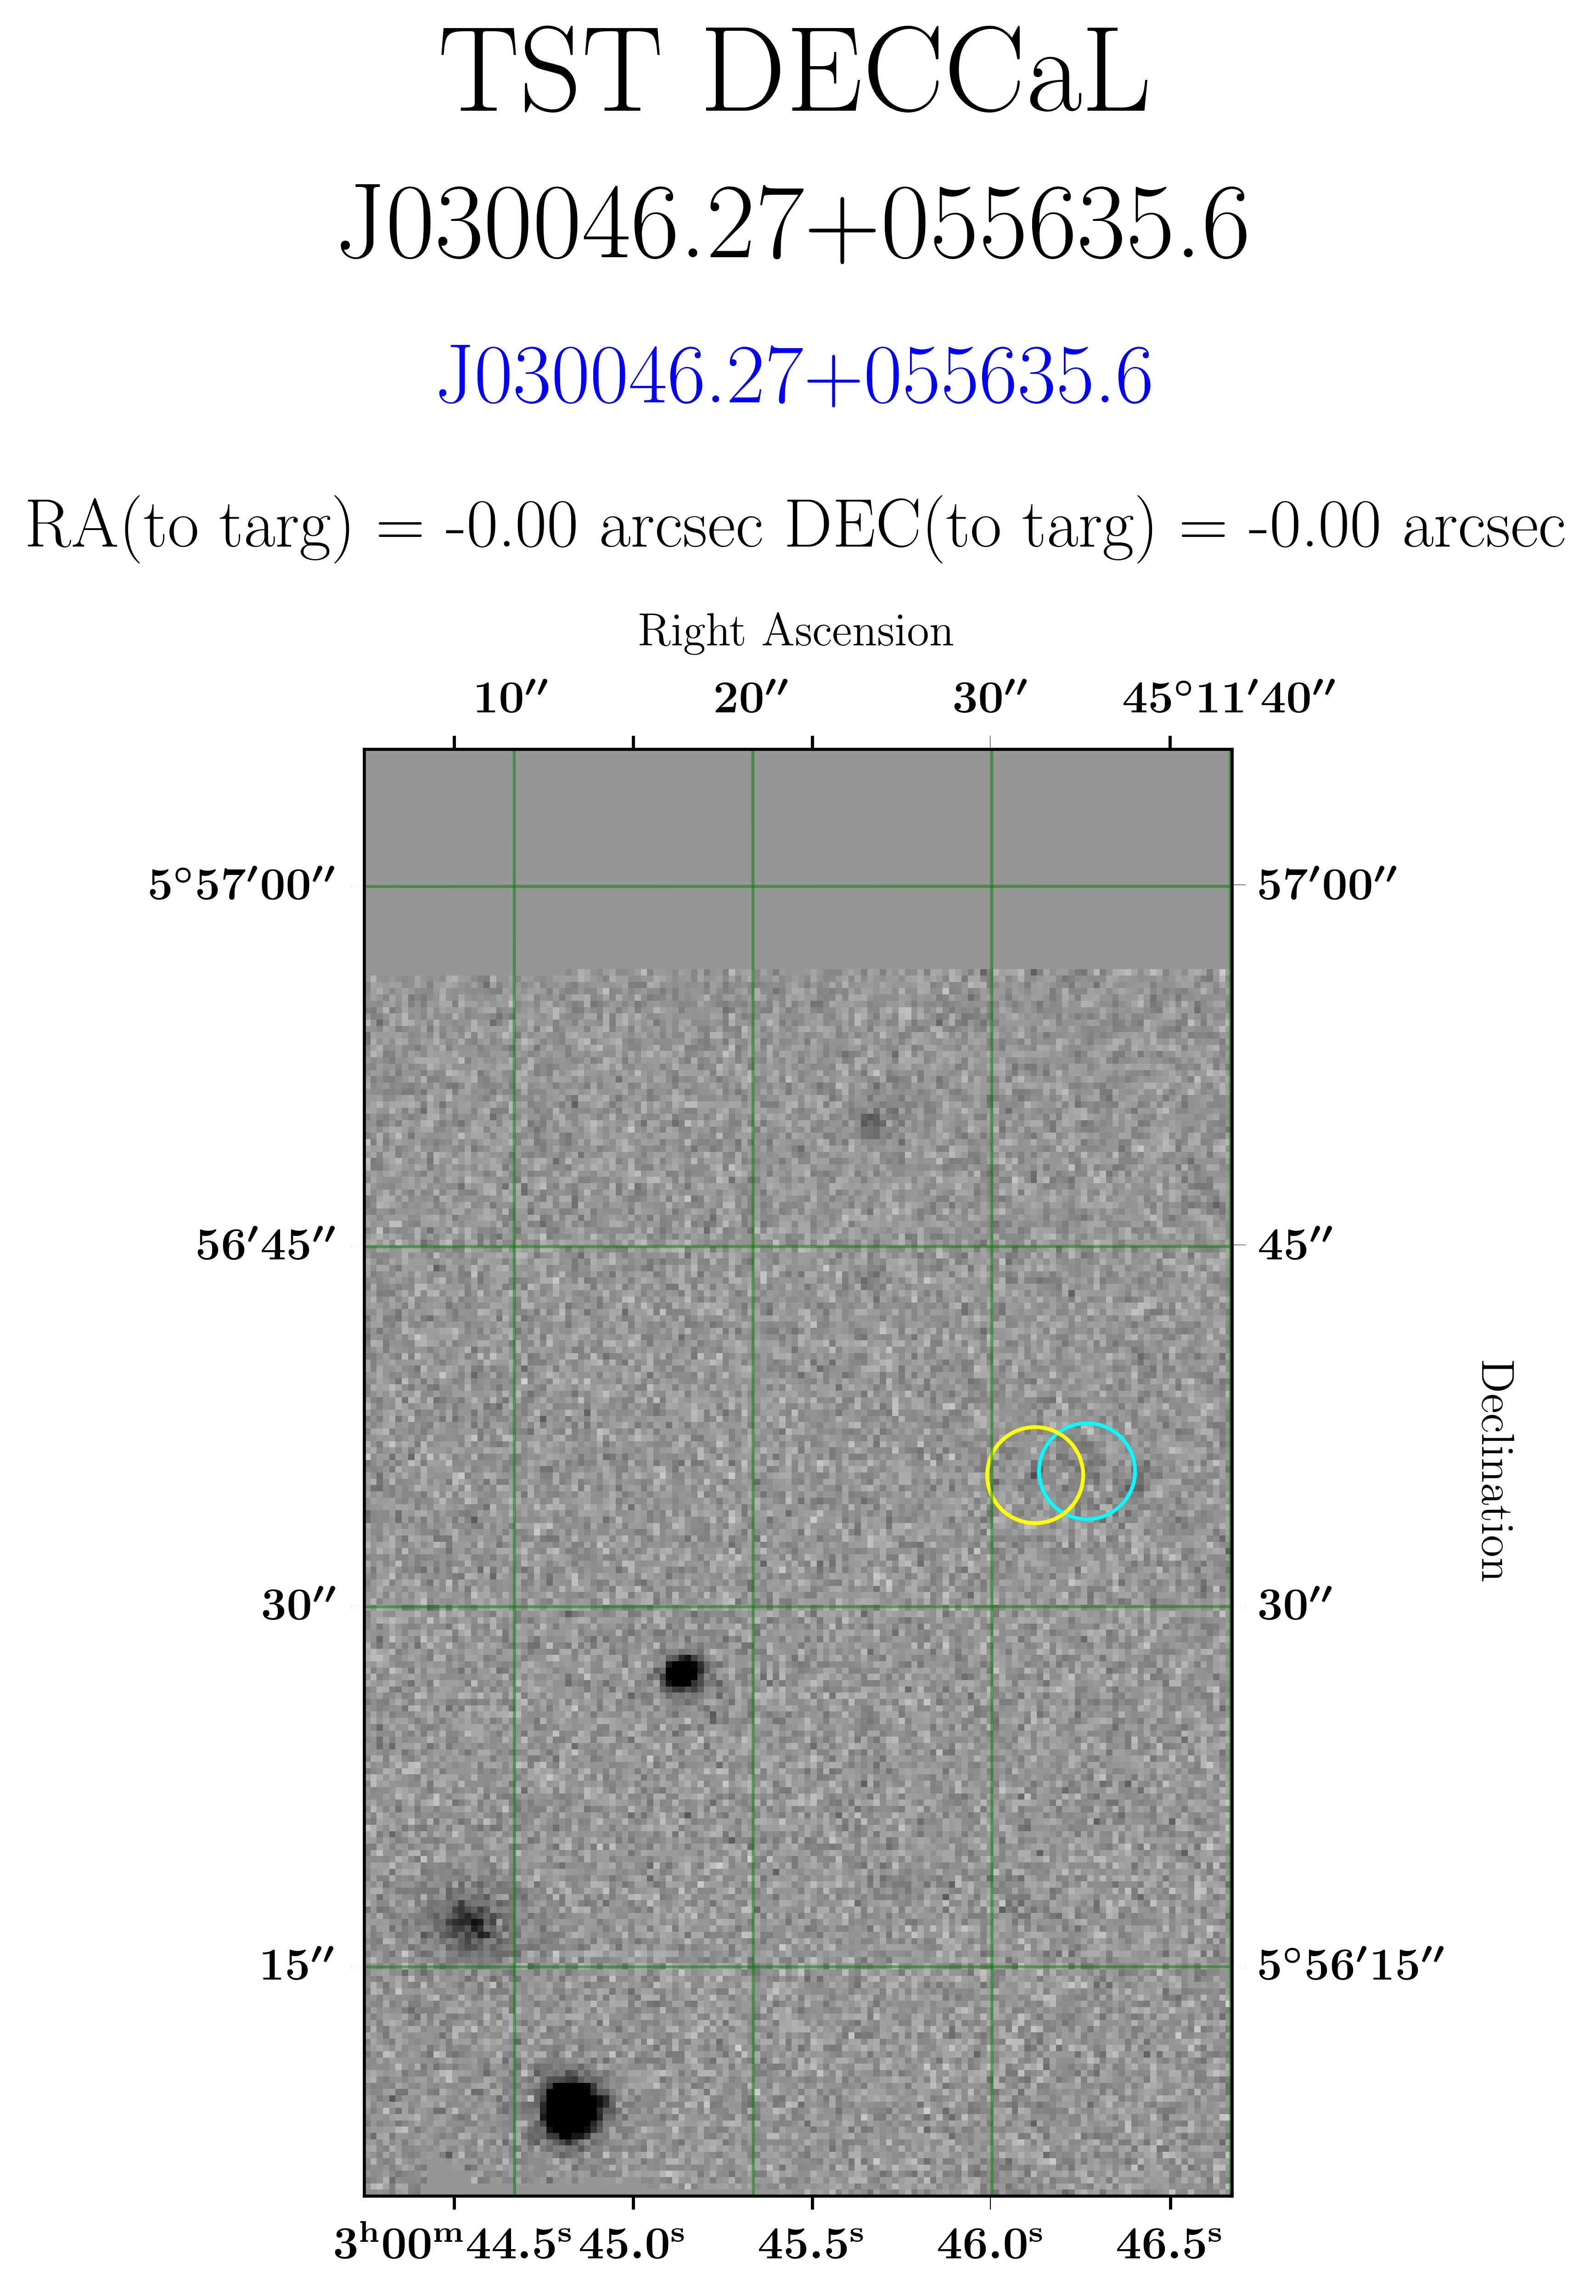

In [10]:
fig, ax = finder.generate(cutout, wcs2, 'TST DECCaL', primary_coord=coord,
                          secondary_coord=coord, third_coord=second,
                         vmnx=(-0.2, 0.2))

----